### 6.	Lakukan semua metoda imputasi (materi 9), jika data yang didapat dari opendata sudah bersih, diperbolehkan membuat data dummy dengan setiap mahasiswa wajib berbeda (buat masing-masing dengan minimal row data 100 dan coloumn 10). Selanjutnya visualisasikan data sebelum imputasi dan sesudah imputasi untuk dibandingkan. 

In [122]:
import pandas as pd
import numpy as np
from feature_engine.imputation import EndTailImputer
from feature_engine.imputation import RandomSampleImputer
from sklearn.impute import SimpleImputer

### Imputasi Mean atau Median

In [123]:
dataset = "Melbourne_housing_FULL.csv"
df = pd.read_csv(dataset)
df = pd.DataFrame(df)
df.head(4)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0


In [124]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [125]:
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
print(df.head(4))

       Suburb             Address  Rooms Type         Price Method SellerG   
0  Abbotsford       68 Studley St      2    h  1.050173e+06     SS  Jellis  \
1  Abbotsford        85 Turner St      2    h  1.480000e+06      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1.035000e+06      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u  1.050173e+06     VB  Rounds   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea   
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0      160.2564  \
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0      160.2564   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0       79.0000   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0      160.2564   

     YearBuilt         CouncilArea Lattitude  Longtitude   
0  1965.289885  Yarra City Council  -37.8014    144.9958  \
1  1965.289885  Yarra City Council  -37.7996    144.9984   
2  1900.000000  Yarra City C

### Imputasi Nilai Suka-suka (Arbitrary)

In [126]:
dataset = "Melbourne_housing_FULL.csv"
df = pd.read_csv(dataset)
df = pd.DataFrame(df)
df.head(4)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0


In [127]:
df = df.fillna(88)
df.head(4)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,88.0,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,88.0,88.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,88.0,88.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,88.0,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,88.0,88.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0


### Imputasi End Of Tail

In [128]:
dataset = "Melbourne_housing_FULL.csv"
df = pd.read_csv(dataset)
df = pd.DataFrame(df)
df.head(4)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0


In [129]:
#Membuat imputer
imputer = EndTailImputer(imputation_method='gaussian', tail='right')

#Fit imputer ke set 
imputer.fit(df)

#Mengubah data
test_t = imputer.transform(df)
test_t

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,2.974575e+06,SS,Jellis,3/09/2016,2.5,3067.0,...,1.000000,1.000000,126.000000,1364.057581,2077.274419,Yarra City Council,-37.801400,144.995800,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1.480000e+06,S,Biggin,3/12/2016,2.5,3067.0,...,1.000000,1.000000,202.000000,1364.057581,2077.274419,Yarra City Council,-37.799600,144.998400,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1.035000e+06,S,Biggin,4/02/2016,2.5,3067.0,...,1.000000,0.000000,156.000000,79.000000,1900.000000,Yarra City Council,-37.807900,144.993400,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,2.974575e+06,VB,Rounds,4/02/2016,2.5,3067.0,...,2.000000,1.000000,0.000000,1364.057581,2077.274419,Yarra City Council,-37.811400,145.011600,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1.465000e+06,SP,Biggin,4/03/2017,2.5,3067.0,...,2.000000,0.000000,134.000000,150.000000,1900.000000,Yarra City Council,-37.809300,144.994400,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1.480000e+06,PI,Jas,24/02/2018,6.3,3013.0,...,1.000000,3.000000,593.000000,1364.057581,2077.274419,Maribyrnong City Council,-37.810530,144.884670,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,8.880000e+05,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.000000,1.000000,98.000000,104.000000,2018.000000,Maribyrnong City Council,-37.815510,144.888260,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,7.050000e+05,S,Jas,24/02/2018,6.3,3013.0,...,1.000000,2.000000,220.000000,120.000000,2000.000000,Maribyrnong City Council,-37.822860,144.878560,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1.140000e+06,SP,hockingstuart,24/02/2018,6.3,3013.0,...,3.797434,4.761158,10790.124833,1364.057581,2077.274419,Maribyrnong City Council,-37.539798,145.362357,Western Metropolitan,6543.0


### Imputasi Frequent Category atau Modus

In [130]:
dataset = "Melbourne_housing_FULL.csv"
df = pd.read_csv(dataset)
df = pd.DataFrame(df)
df.head(4)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0


In [131]:
imp = SimpleImputer(strategy='most_frequent')
imp.fit_transform(df)

array([['Abbotsford', '68 Studley St', 2, ..., 144.9958,
        'Northern Metropolitan', 4019.0],
       ['Abbotsford', '85 Turner St', 2, ..., 144.9984,
        'Northern Metropolitan', 4019.0],
       ['Abbotsford', '25 Bloomburg St', 2, ..., 144.9934,
        'Northern Metropolitan', 4019.0],
       ...,
       ['Yarraville', '147A Severn St', 2, ..., 144.87856,
        'Western Metropolitan', 6543.0],
       ['Yarraville', '12/37 Stephen St', 3, ..., 144.9966,
        'Western Metropolitan', 6543.0],
       ['Yarraville', '3 Tarrengower St', 2, ..., 144.89351,
        'Western Metropolitan', 6543.0]], dtype=object)

### Imputasi Random Sample

In [132]:
dataset = "Melbourne_housing_FULL.csv"
df = pd.read_csv(dataset)
df = pd.DataFrame(df)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [133]:
#Membuat imputernya
imputer = RandomSampleImputer(random_state = 29)

#Fit imputer ke set 
imputer.fit(df)

#Mengubah data
test_t = imputer.transform(df)
test_t

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,516000.0,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,115.0,1890.0,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,84.0,1900.0,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,651000.0,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,145.0,2012.0,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,146.0,1940.0,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,1.0,2.0,0.0,70.0,2013.0,Maribyrnong City Council,-37.74050,144.96440,Western Metropolitan,6543.0


### Imputasi Nilai Nol atau Konstanta

In [134]:
dataset = "Melbourne_housing_FULL.csv"
df = pd.read_csv(dataset)
df = pd.DataFrame(df)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [135]:
df.fillna(0)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,0.0,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,0.0,0.0,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,0.0,0.0,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,0.0,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,0.0,0.0,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,0.0,0.0,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,0.0,0.0,0.0,0.0,0.0,Maribyrnong City Council,0.00000,0.00000,Western Metropolitan,6543.0


### Imputasi Regresi: Deterministik

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn import linear_model

%matplotlib inline

In [137]:
dataset = "Melbourne_housing_FULL.csv"
df = pd.read_csv(dataset)
df = pd.DataFrame(df)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [139]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [140]:
to_drop = ['Suburb', 
           'Address', 
           'Type', 
           'Method', 
           'SellerG',
           'Date',
           'CouncilArea',
           'Regionname']

df.drop(to_drop, inplace=True, axis=1)

In [141]:
to_drop = ['Rooms', 
           'Distance', 
           'Postcode', 
           'Propertycount']

df.drop(to_drop, inplace=True, axis=1)

In [142]:
df.head()

,Price,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
0,NaN,2.0,1.0,1.0,126.0,NaN,NaN,-37.8014,144.9958
1,1480000.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984
2,1035000.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934
3,NaN,3.0,2.0,1.0,0.0,NaN,NaN,-37.8114,145.0116
4,1465000.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944


In [143]:
df.loc[df["Price"] == 0.0, "Price"] = np.NAN
df.loc[df["Bedroom2"] == 0.0, "Bedroom2"] = np.NAN
df.loc[df["Bathroom"] == 0.0, "Bathroom"] = np.NAN
df.loc[df["Car"] == 0.0, "Car"] = np.NAN
df.loc[df["Landsize"] == 0.0, "Landsize"] = np.NAN
df.loc[df["BuildingArea"] == 0.0, "BuildingArea"] = np.NAN
df.loc[df["YearBuilt"] == 0.0, "YearBuilt"] = np.NAN
df.loc[df["Lattitude"] == 0.0, "Lattitude"] = np.NAN
df.loc[df["Longtitude"] == 0.0, "Longtitude"] = np.NAN

#Menghitung nilai null dari dataframe, dan hanya 9 kolom dengan menambahkan [0:9]
df.isnull().sum()[0:9]

Price            7610
Bedroom2         8234
Bathroom         8272
Car             10359
Landsize        14247
BuildingArea    21191
YearBuilt       19306
Lattitude        7976
Longtitude       7976
dtype: int64

<Axes: >

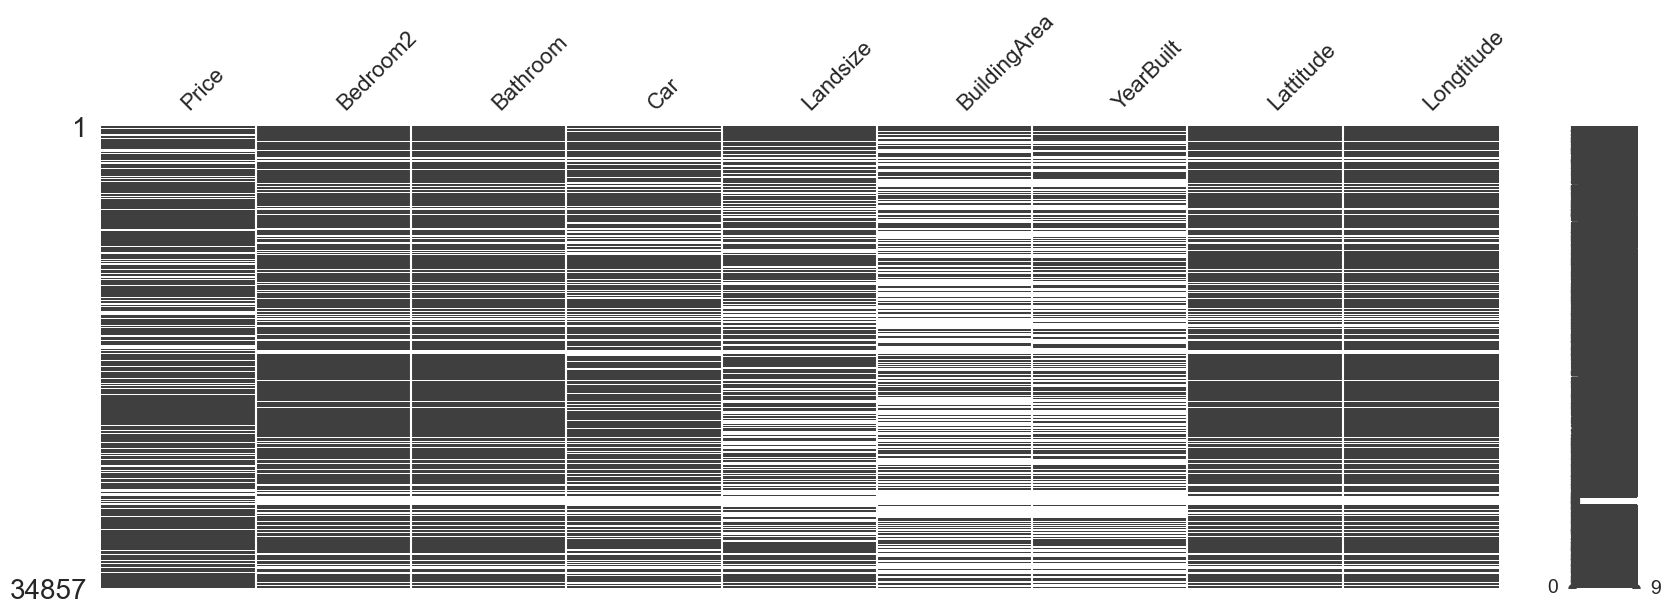

In [144]:
mno.matrix(df, figsize = (20, 6))

In [145]:
missing_columns = ["Price", "BuildingArea", "YearBuilt", "Bedroom2", "Bathroom", "Car", "Landsize", "Lattitude", "Longtitude"]

In [146]:
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

In [147]:
for feature in missing_columns:
    df[feature + '_imp'] = df[feature]
    df = random_imputation(df, feature)

In [148]:
#Deterministic Regression Imputation
deter_df = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:        
    deter_df["Det" + feature] = df[feature + "_imp"]
    parameters = list(set(df.columns) - set(missing_columns) - {feature + '_imp'})
    
    #Membuat model Regresi Linier untuk memperkirakan data yang hilang    
    model = linear_model.LinearRegression()
    model.fit(X = df[parameters], y = df[feature + '_imp'])
    
    #Menyimpan indeks data yang hilang dari kerangka data asli    
    deter_df.loc[df[feature].isnull(), "Det" + feature] = model.predict(df[parameters])[df[feature].isnull()]

<Axes: >

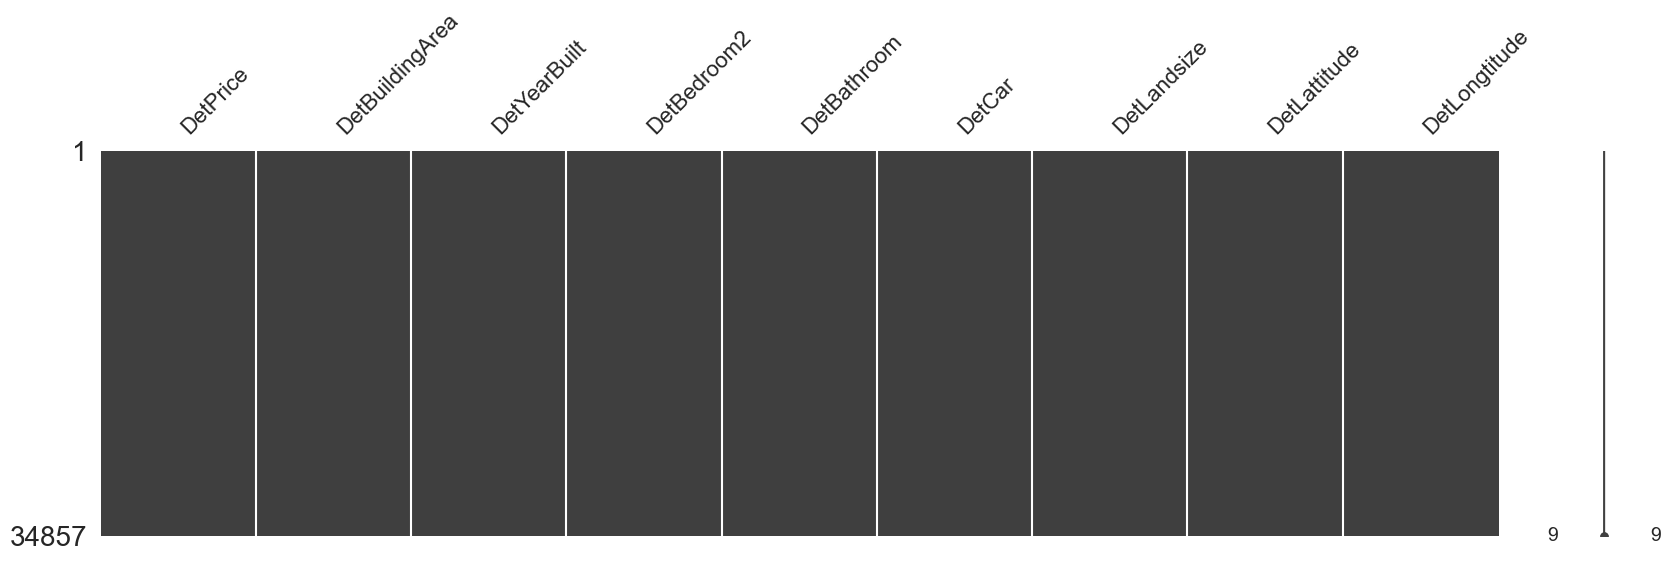

In [149]:
#Membuat matriks
mno.matrix(deter_df, figsize = (20,5))

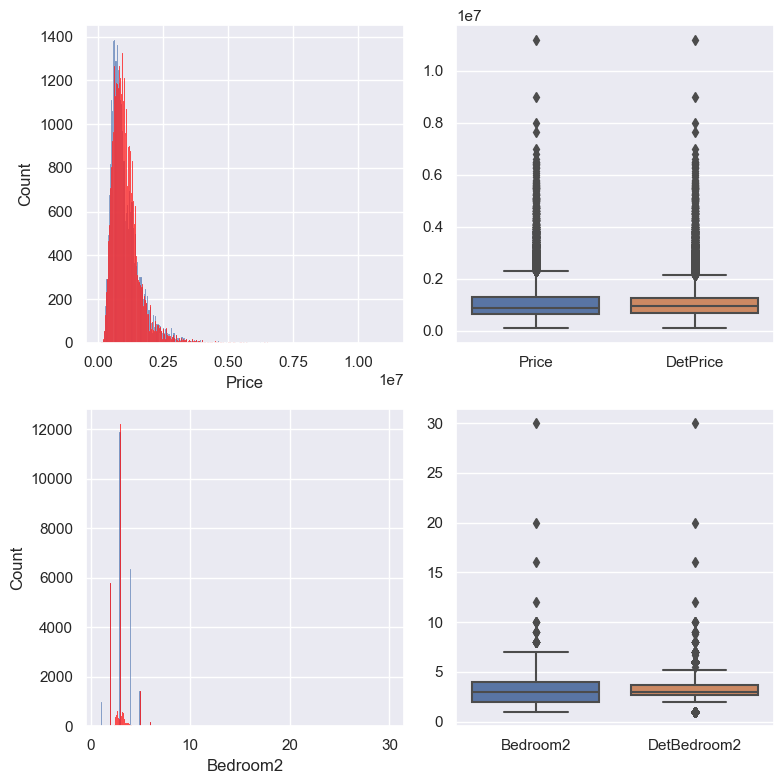

In [150]:
#Membuat chart
sns.set()
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(8, 8)

for index, variable in enumerate(["Price", "Bedroom2"]):
    sns.histplot(df[variable].dropna(), kde = False, ax = axes[index, 0])
    sns.histplot(deter_df["Det" + variable], kde = False, ax = axes[index, 0], color = 'red')
    
    sns.boxplot(data = pd.concat([df[variable], deter_df["Det" + variable]], axis = 1),
                ax = axes[index, 1])
    
plt.tight_layout()

In [151]:
#Menampilkan nilai perhitungan statistika untuk kolom tertentu
pd.concat([df[["Price", "Bedroom2"]], deter_df[["DetPrice", "DetBedroom2"]]], axis = 1).describe().T

,count,mean,std,min,25%,50%,75%,max
Price,27247.0,1.050173e+06,641467.130105,85000.0,635000.000000,870000.0,1.295000e+06,11200000.0
Bedroom2,26623.0,3.086617e+00,0.977899,1.0,2.000000,3.0,4.000000e+00,30.0
DetPrice,34857.0,1.060287e+06,578282.280121,85000.0,690000.000000,945000.0,1.270000e+06,11200000.0
DetBedroom2,34857.0,3.080773e+00,0.882384,1.0,2.682897,3.0,3.724045e+00,30.0


### Imputasi Regresi: Stokastik

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn import linear_model

%matplotlib inline

In [153]:
df = pd.read_csv("Melbourne_housing_FULL.csv")
df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [155]:
to_drop = ['Suburb', 
           'Address', 
           'Type', 
           'Method', 
           'SellerG',
           'Date',
           'CouncilArea',
           'Regionname']

df.drop(to_drop, inplace=True, axis=1)

In [156]:
to_drop = ['Rooms', 
           'Distance', 
           'Postcode', 
           'Propertycount']

df.drop(to_drop, inplace=True, axis=1)

In [157]:
df.loc[df["Price"] == 0.0, "Price"] = np.NAN
df.loc[df["Bedroom2"] == 0.0, "Bedroom2"] = np.NAN
df.loc[df["Bathroom"] == 0.0, "Bathroom"] = np.NAN
df.loc[df["Car"] == 0.0, "Car"] = np.NAN
df.loc[df["Landsize"] == 0.0, "Landsize"] = np.NAN
df.loc[df["BuildingArea"] == 0.0, "BuildingArea"] = np.NAN
df.loc[df["YearBuilt"] == 0.0, "YearBuilt"] = np.NAN
df.loc[df["Lattitude"] == 0.0, "Lattitude"] = np.NAN
df.loc[df["Longtitude"] == 0.0, "Longtitude"] = np.NAN

#Menghitung nilai null dari dataframe, dan hanya 9 kolom dengan menambahkan [0:9]
df.isnull().sum()[0:9]

Price            7610
Bedroom2         8234
Bathroom         8272
Car             10359
Landsize        14247
BuildingArea    21191
YearBuilt       19306
Lattitude        7976
Longtitude       7976
dtype: int64

<Axes: >

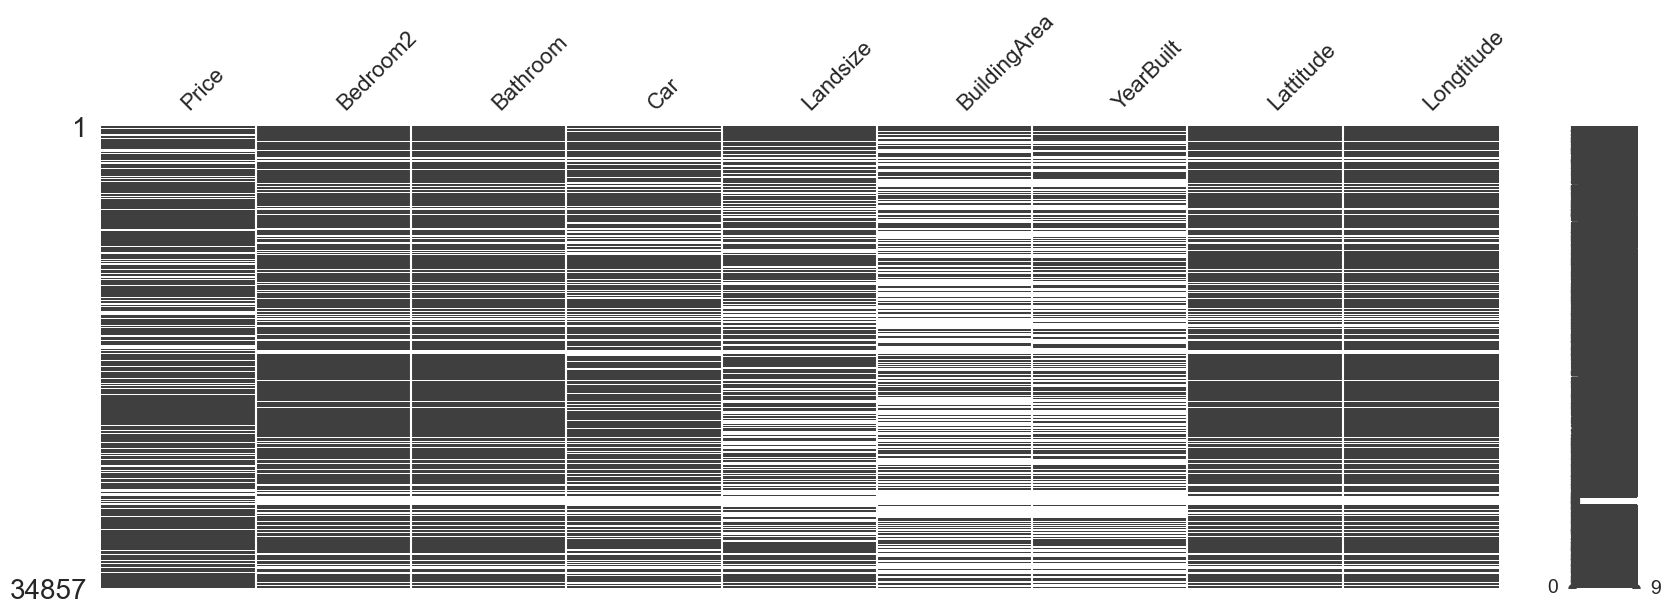

In [158]:
mno.matrix(df, figsize = (20, 6))

In [159]:
missing_columns = ["Price", "BuildingArea", "YearBuilt", "Bedroom2", "Bathroom", "Car", "Landsize", "Lattitude", "Longtitude"]

In [160]:
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

In [161]:
for feature in missing_columns:
    df[feature + '_imp'] = df[feature]
    df = random_imputation(df, feature)

In [162]:
#Stochastic Regression Imputation
random_data = pd.DataFrame(columns = ["Ran" + name for name in missing_columns])

for feature in missing_columns:
        
    random_data["Ran" + feature] = df[feature + '_imp']
    parameters = list(set(df.columns) - set(missing_columns) - {feature + '_imp'})
    
    model = linear_model.LinearRegression()
    model.fit(X = df[parameters], y = df[feature + '_imp'])
    
    #Kesalahan Standar dari perkiraan regresi sama dengan std() dari kesalahan setiap perkiraan    
    predict = model.predict(df[parameters])
    std_error = (predict[df[feature].notnull()] - df.loc[df[feature].notnull(), feature + '_imp']).std()
    
    #Menyimpan indeks data yang hilang dari kerangka data asli
    random_predict = np.random.normal(size = df[feature].shape[0], 
                                      loc = predict, 
                                      scale = std_error)
    random_data.loc[(df[feature].isnull()) & (random_predict > 0), "Ran" + feature] = random_predict[(df[feature].isnull()) & 
                                                                            (random_predict > 0)]

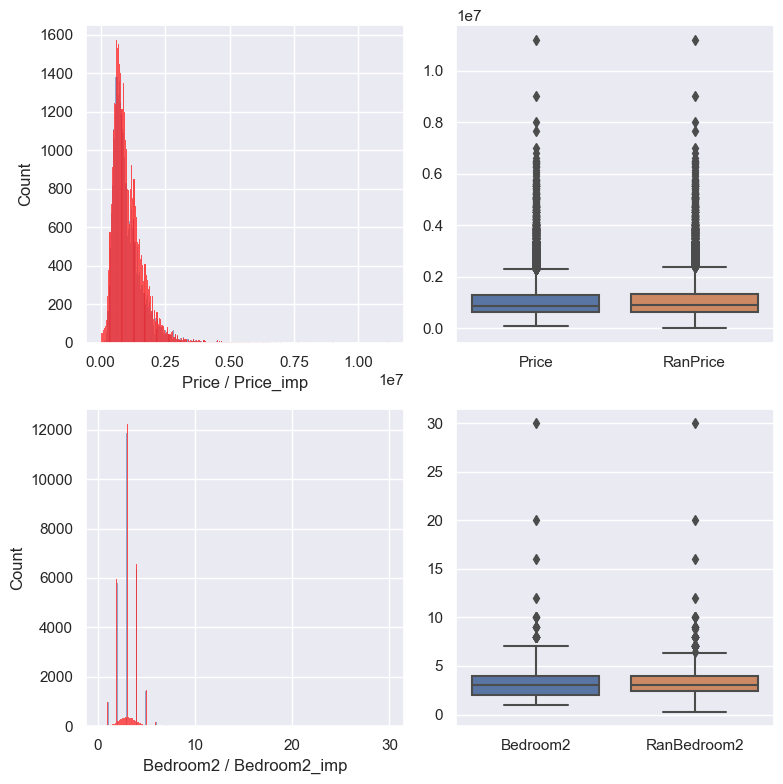

In [163]:
sns.set()
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(8, 8)

for index, variable in enumerate(["Price", "Bedroom2"]):
    sns.histplot(df[variable].dropna(), kde = False, ax = axes[index, 0])
    sns.histplot(random_data["Ran" + variable], kde = False, ax = axes[index, 0], color = 'red')
    axes[index, 0].set(xlabel = variable + " / " + variable + '_imp')
    
    sns.boxplot(data = pd.concat([df[variable], random_data["Ran" + variable]], axis = 1),
                ax = axes[index, 1])
    
    plt.tight_layout()

In [164]:
pd.concat([df[["Price", "Bedroom2"]], random_data[["RanPrice", "RanBedroom2"]]], axis = 1).describe().T

,count,mean,std,min,25%,50%,75%,max
Price,27247.0,1.050173e+06,641467.130105,85000.000000,635000.000000,870000.0,1295000.0,11200000.0
Bedroom2,26623.0,3.086617e+00,0.977899,1.000000,2.000000,3.0,4.0,30.0
RanPrice,34857.0,1.067367e+06,628491.999776,385.076779,645000.000000,906000.0,1340000.0,11200000.0
RanBedroom2,34857.0,3.078863e+00,0.952660,0.297721,2.435392,3.0,4.0,30.0
